In [9]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('yeahbuddy.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(400, 400)


In [12]:
import torch
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


choose from the 3 methods(1|2|3):
	1
	2
	3
358/1000 = 0.358


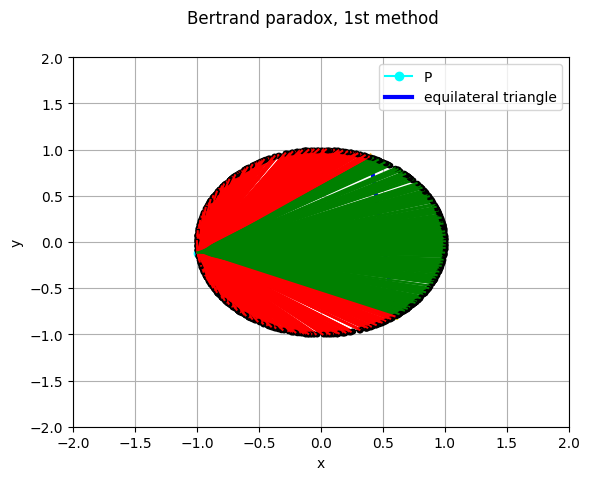

In [20]:
from random import random
from matplotlib import pyplot as plt
import numpy as np
import math


class Bertrand:
    def __init__(self):
        # creates a figure and an Axes object(the plotting area)
        self.fig, self.ax = plt.subplots()
        # side of the equilateral triangle
        self.a = 0

    def distance(self, A, B):
        return math.sqrt((A[0] - B[0])**2 + (A[1] - B[1])**2)

    def draw_circle(self, r):
        self.ax.set_xlim((-r - 1, r + 1)), self.ax.set_ylim((-r - 1, r + 1))
        self.ax.set_xlabel('x'), self.ax.set_ylabel('y')

        circle = plt.Circle((0, 0), r, color='black', fill=False)
        # Artist: represent a standard graphical object, knows how to use the renderer to paint it
        self.ax.add_artist(circle)

    def draw_triangle(self, P):
        x, y = P
        # stack arrays in sequence horizontally (column wise)
        points = np.hstack([x, y])
        self.ax.plot(x, y, color='cyan', marker='o', label='P')

        # calculate the other 2 points of the equilateral triangle
        # rotate P by 60, 120 degrees => A, B points
        angle = np.deg2rad(120)
        x = P[0] * np.cos(angle) - (P[1] * np.sin(angle))
        y = P[0] * np.sin(angle) + (P[1] * np.cos(angle))
        A = (x, y)
        points = np.vstack([points, [x, y]])
        self.ax.plot(x, y, color='yellow', marker='*')

        angle = np.deg2rad(240)
        x = P[0] * np.cos(angle) - (P[1] * np.sin(angle))
        y = P[0] * np.sin(angle) + (P[1] * np.cos(angle))
        B = (x, y)

        self.a = self.distance(A, B)
        points = np.vstack([points, [x, y]])
        self.ax.plot(x, y, color='orange', marker='*')

        points = np.vstack([points, [P[0], P[1]]])
        self.ax.plot(points[:, 0], points[:, 1], linewidth=3, color='blue', label='equilateral triangle')

    def first_method(self):
        r = float(input('r = '))
        n = int(input('n = '))

        self.fig.suptitle('Bertrand paradox, 1st method')
        self.draw_circle(r)

        # get a fixed P point on the circumference
        alpha = random() * (2 * np.pi)
        x, y = r * np.cos(alpha), r * np.sin(alpha)
        P = (x, y)
        self.draw_triangle(P)

        favorable = 0
        # generate random points on the circumference
        for i in range(n):
            alpha = random() * (2 * np.pi)
            x, y = r * np.cos(alpha), r * np.sin(alpha)
            # the new point
            M = (x, y)
            self.ax.plot(x, y, color='black', marker='.')
            if self.distance(P, M) > self.a:
                self.ax.plot([P[0], x], [P[1], y], color='green')
                favorable += 1
            else:
                self.ax.plot([P[0], x], [P[1], y], color='red')

        print('{0}/{1} = {2}'.format(favorable, n, favorable/n))

        plt.legend()
        plt.grid()
        plt.show()

def second_method(self):
        r = float(input('r = '))
        n = int(input('n = '))
        self.fig.suptitle('Bertrand paradox, 2nd method')
        self.draw_circle(r)

        # draw a random radius
        alpha = random() * (2 * np.pi)
        x, y = r * np.cos(alpha), r * np.sin(alpha)
        plt.plot([0, x], [0, y], color='black', linewidth=3, label='radius')

        # perpendicular angle to alpha
        beta = abs(alpha - np.pi/2)
        x, y = r * np.cos(alpha), r * np.sin(alpha)
        # get a fixed P point on the circumference
        P = (x, y)
        self.draw_triangle(P)

        A = r_middlex, r_middley = r / 2 * np.cos(alpha), r / 2 * np.sin(alpha)
        plt.plot(r_middlex, r_middley, color='darkblue', marker='o', label='middle of the radius')

        favorable = 0
        for i in range(n):
            # random point on the radius
            m = random() * r
            x, y = m * np.cos(alpha), m * np.sin(alpha)
            M = (x, y)
            plt.plot(x, y, color='orange', marker='.')

            # perpendicular line to the radius in the generated point
            x, y = M
            # cord length
            length = math.sqrt(pow(r, 2) - pow(self.distance(M, (0, 0)), 2))
            x1, y1 = x + length * np.cos(beta), y + length * np.sin(beta)
            x2, y2 = x - length * np.cos(beta), y - length * np.sin(beta)
            if self.distance(A, (0, 0)) < self.distance(M, (0, 0)):
                plt.plot([x1, x2], [y1, y2], color='red')
            else:
                plt.plot([x1, x2], [y1, y2], color='green')
                favorable += 1

        print('{0}/{1} = {2}'.format(favorable, n, favorable / n))

        plt.legend()
        plt.grid()
        plt.show()

def third_method(self):
        r = float(input('r = '))
        n = int(input('n = '))
        self.fig.suptitle('Bertrand paradox, 3rd method')
        self.draw_circle(r)

        # get a fixed P point on the circumference
        alpha = random() * (2 * np.pi)
        P = x, y = r * np.cos(alpha), r * np.sin(alpha)
        self.draw_triangle(P)

        # draw a smaller circle
        circle = plt.Circle((0, 0), r / 2, color='grey', fill=False)
        self.ax.add_artist(circle)

        favorable = 0
        for i in range(n):
            # generate a new point within the circle
            alpha = random() * (2 * np.pi)
            rand_r = math.sqrt(random())
            x, y = rand_r * r * np.cos(alpha), rand_r * r * np.sin(alpha)
            # the new point
            M = (x, y)
            if self.distance(M, (0, 0)) <= r / 2:
                plt.plot(x, y, color='green', marker='.')
                favorable += 1
            else:
                plt.plot(x, y, color='red', marker='.')

        print('{0}/{1} = {2}'.format(favorable, n, favorable / n))

        plt.legend()
        plt.grid()
        plt.show()


def main():
    print('choose from the 3 methods(1|2|3):\n\t1\n\t2\n\t3')
    choice = 0
    while 0 <= choice <= 3:
        choice = int(input('choice = '))
        bert = Bertrand()
        if choice == 1:
            bert.first_method()
            break
        elif choice == 2:
            bert.second_method()
            break
        else:
            bert.third_method()
            break


if __name__ == '__main__':
    main()
